In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv

In [2]:
data = pd.read_csv("Adops & Data Scientist Sample Data - Q2 Regression.csv", header=None)

In [3]:
data.columns = ["A", "B", "C"]

In [4]:
data.head(5)

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


To build a simple linear regression model, we need to check if there is some correlation between the independent variables A,B with respect to C. <br>

Also, we need to check if the dependent varibles themselves (A,B) have no correlation with respect to each other. If there is a strong correlation between the independent varibles, we need to drop one of them.

In [5]:
data.corr()

,A,B,C
A,1.000000,-0.192345,-0.077280
B,-0.192345,1.000000,0.006031
C,-0.077280,0.006031,1.000000


The matrix above shows the following: <br>
1. There is a good negative correlation (-0.618516) between B and C.
2. There is hardly any correlation (0.010536 ~ 0) between A and C. 
3. There is negligible correlation between the dependent variables A and B (-0.187059)

We can build a regression model between B and C. The correlation between A & C is not high which means they are not linearly related to each other. 

Lets build a scatter plot to have a better visual understanding of the correlation values.

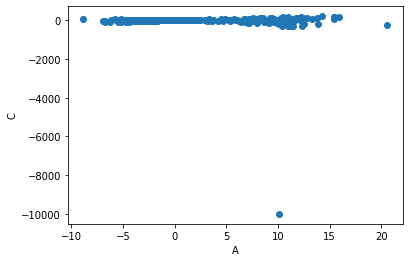

In [6]:
# Scatter plot between A and C
# Oddly, the plot shows a very strong linear relationship between A and C. 
# This contradicts the correlation value of 0.010536!!!!

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data["A"], data["C"])
plt.xlabel("A")
plt.ylabel("C")
plt.show()

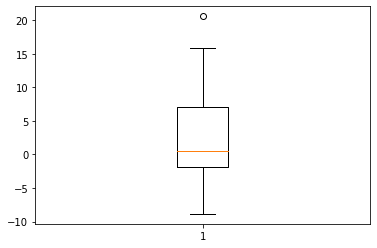

In [7]:
# Lets analyse the box plot of the variable A. 
# The box plot of A looks fine. 
plt.boxplot(data["A"])
plt.show()

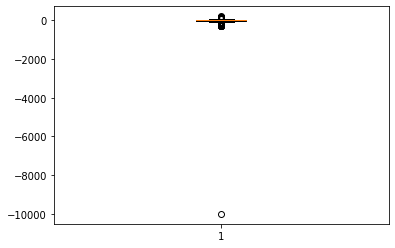

In [8]:
# Lets analyse the box plot of the variable C. 
# The box plot of C gives an indication that there is an outlier in C. 
# The outlier seems to be somewhere around -10,000 and its the minimum value for C.

plt.boxplot(data["C"])
plt.show()

In [9]:
# Lets remove this outlier from the data where C value is minimum around -10,000. 
# Since linear regression models are sensitive to outliers, we need to remove them

data = data[data.C!=data.C.min()]
data.shape

(299, 3)

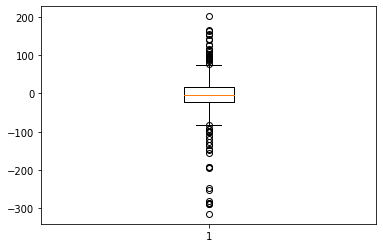

In [10]:
# Boxplot of C again
plt.boxplot(data["C"])
plt.show()

Now the outliers are not present in the data. And the boxplot of C looks fine

Text(0, 0.5, 'C')

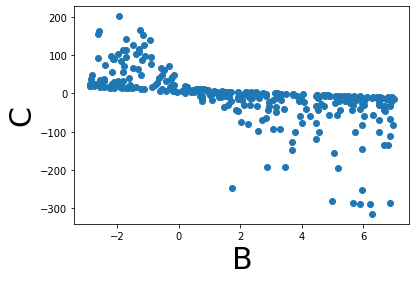

In [18]:
# The plot between B and C shows a good linear relationship between the two.

plt.plot(data["B"], data["C"], 'o')
plt.xlabel("B", size=30)
plt.ylabel("C", size=30)

###  Split data into train and test

In [19]:
len(data)

299

In [20]:
# Adding the intercept term for the data
# This intercept term is required for regression

data["intercept"] = 1

In [21]:
# Lets split the data with 80% as training data and 20% as test data

def split_data(data, train_split=0.8):
    samples = len(data)
    train_end_index = int(samples * train_split)
    
    train_df = data[0:train_end_index]
    test_df = data[train_end_index:]
    return train_df, test_df
    

In [22]:
train, test = split_data(data)
train.shape, test.shape

((239, 4), (60, 4))

In [23]:
X_train = train[["B", "intercept"]]
y_train = train["C"]

X_test = test[["B", "intercept"]]
y_test = test["C"]

### Linear Regression model using the closed form solution


$ \beta = (X^TX)^{-1}X^T y $

The reason for using closed form solution is that the size of data is small and the number of features is less.
If the number of features or the size of data is huge, we would have to use Gradient Descent or Batch Gradient descent for updating weights

In [24]:
# Calculate the coefficients using the closed form solution.

coeffs = inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

In [25]:
coeffs

array([-10.45520242,  16.65981496])

In [26]:
# zip the coeffecient values along with the features names
# The coefficient for the feature A is really low because there is no strong linear relationship between A and C.

dict(zip(list(X_train.columns), list(coeffs)))

{'B': -10.455202421603552, 'intercept': 16.659814956526265}

In [27]:
# Defining a function to calculate the root mean square error of the model.

def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred)**2)/len(y))
    return rmse

In [28]:
# Defining a function to calculate the R-squared value of the model.

def r_square(y, y_pred):
    mean_y = np.mean(y)
    sst = sum((y - mean_y)**2)
    sse = sum((y - y_pred)**2)
    r2 = 1 - (sse/sst)
    return r2

In [29]:
# Use the functions and calculate train and test data RMSE and R-Squared

# Train rmse and train rsquare

y_pred_train = X_train.dot(coeffs)
y_pred_test = X_test.dot(coeffs)

print("Train RMSE", rmse(y_train, y_pred_train))
print("Train R-square", r_square(y_train, y_pred_train))
print("\n")
print("Test RMSE", rmse(y_test, y_pred_test))
print("Test R-square", r_square(y_test, y_pred_test))


Train RMSE 44.330127471323934
Train R-square 0.33785710319995466


Test RMSE 93.03838077380637
Test R-square 0.3506313364988114


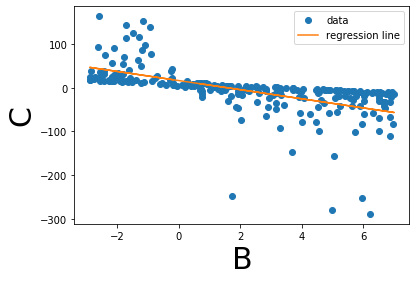

In [35]:
# Plot for regression line on the training data

plt.plot(X_train["B"], y_train, 'o', label="data")
plt.plot(X_train["B"], coeffs[0]*X_train["B"] + coeffs[1], label="regression line")
plt.xlabel("B", size=30)
plt.ylabel("C", size=30)
plt.legend(loc="upper right")
plt.show()

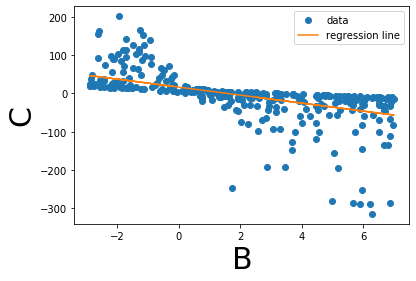

In [40]:
# Plot for the regression line on the whole data

plt.plot(data["B"], data["C"], 'o', label="data")
plt.plot(data["B"], coeffs[0]*data["B"] + coeffs[1], label="regression line")
plt.xlabel("B", size=30)
plt.ylabel("C", size=30)
plt.legend(loc="upper right")
plt.show()